Author : Shraddha Ghadage

# Task 3 : Exploratory Data Analysis on 'SampleSuperStore' dataset

# Try to find out weak areas where you can work to make more profit.

Dataset: https://bit.ly/3i4rbWl


What all bussiness problems you can derive by exploring the data?

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
store = pd.read_csv("Sample Superstore.csv")
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
# looking for any missing values
store.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
# Checking the statistical values of the dataset
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# dertermining if there are any duplicate values 
store.duplicated().sum()

17

In [7]:
#Dropping the duplicated values
store = store.drop_duplicates()

In [8]:
# Dropping the Postalcode column, since it is not necessary in the analysis

store= store.drop(["Postal Code"],axis=1)

In [9]:
store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [10]:
store.shape

(9977, 12)

In [11]:
store.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

# Data Visualization

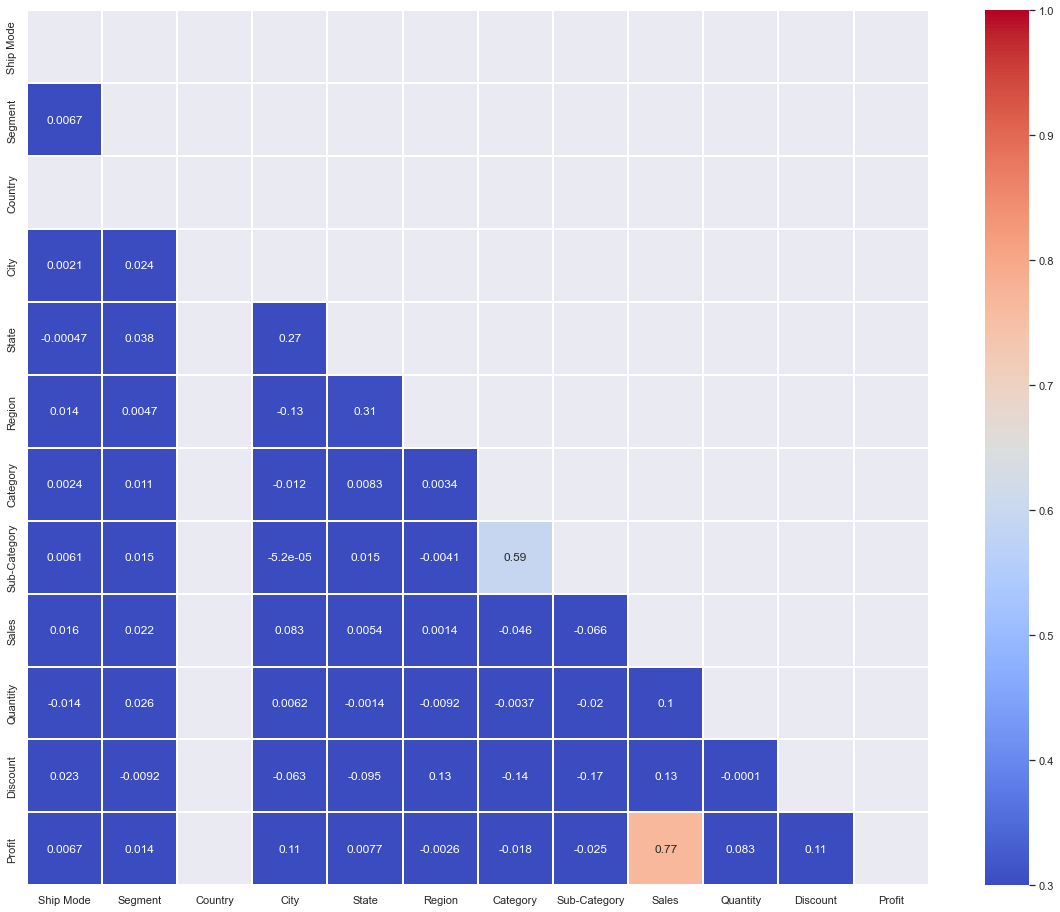

In [29]:
#Set and compute the Correlation Matrix:
sns.set(style="dark")
plt.figure(figsize=(18, 15))

corr = store.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=0.3, vmax=1)

Inferences:
1. No strong positive correlation is seen between any of the attributes.
2. Discount and profit are negative correlated

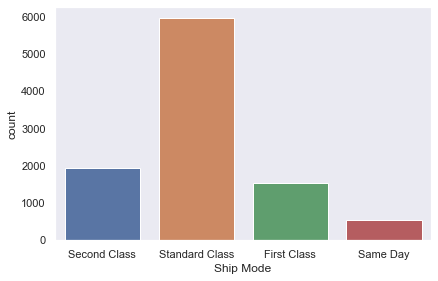

In [30]:
sns.countplot(x= store['Ship Mode'])
plt.show()

'Standard Class' is the most used shipping mode

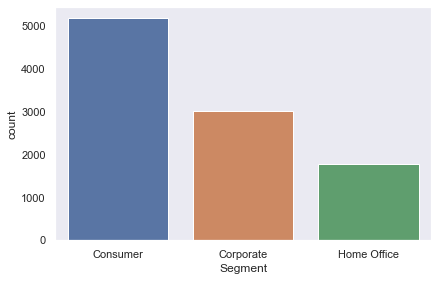

In [31]:
sns.countplot(x= store['Segment'])
plt.show()

###  Exploring the Categories and sub-categories of items sold

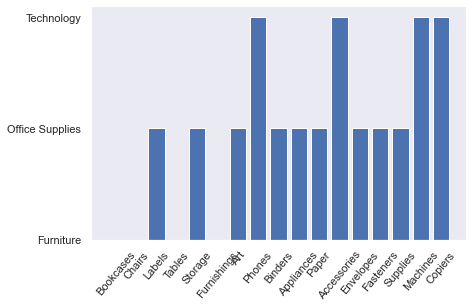

In [33]:
plt.bar(store['Sub-Category'], store['Category'])
plt.xticks(rotation=50)
plt.show()

The items belonging to 'Office Supplies' category have the highest demand

<Figure size 720x360 with 0 Axes>

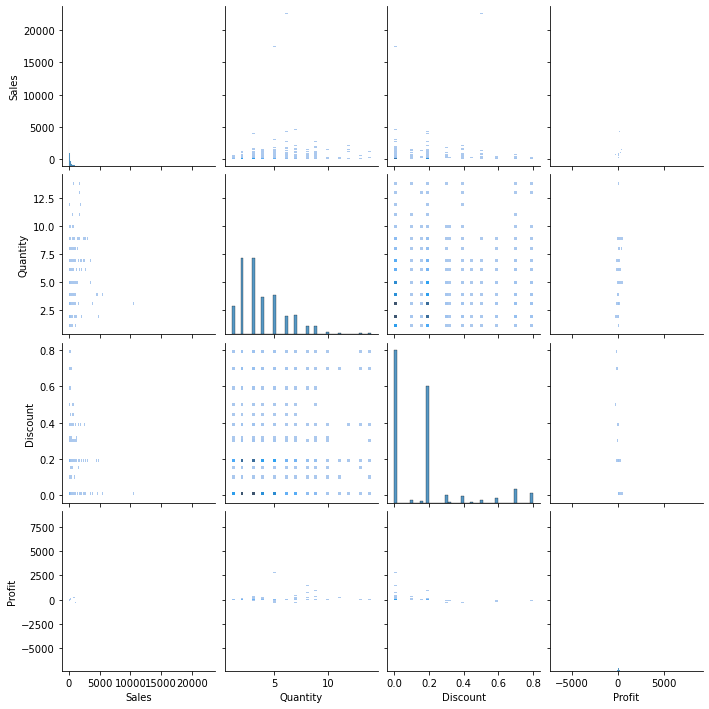

In [16]:
plt.figure(figsize=(10,5))
sns.pairplot(store, kind = "hist")
plt.show()

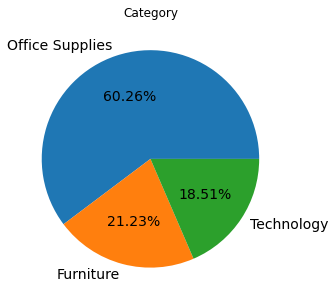

In [17]:
plt.figure(figsize=(5,5))
textprops = {"fontsize":14}
plt.title('Category')
plt.pie(store["Category"].value_counts(),labels= store['Category'].value_counts().index, autopct= '%1.2f%%', textprops =textprops)
plt.show()

<Figure size 864x1440 with 0 Axes>

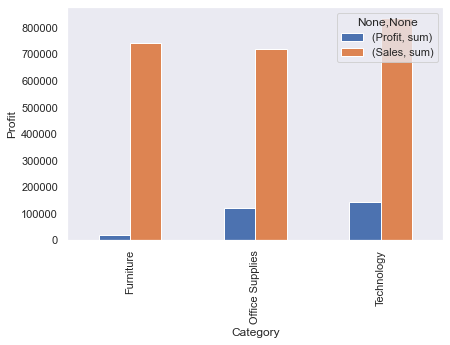

In [34]:
plt.figure(figsize=(12,20))
store.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

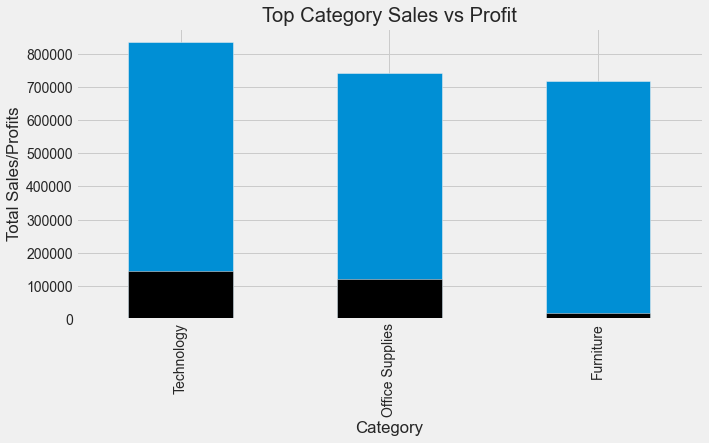

In [35]:
top_category_sales = store.groupby("Category").Sales.sum().nlargest(n=100)
top_category_profit = store.groupby("Category").Profit.sum().nlargest(n=100)

plt.style.use('fivethirtyeight')
top_category_sales.plot(kind='bar', figsize = (10,5), fontsize = 14)
top_category_profit.plot(kind='bar', figsize = (10,5), fontsize = 14,color = 'black')
plt.xlabel('Category')
plt.ylabel('Total Sales/Profits')
plt.title("Top Category Sales vs Profit")
plt.show()

We should increase Sales of technology and office supplies and increase the prices of furniture category as it has very less profits as cmpared to sales.



In [20]:
store.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [21]:
store["Category"].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

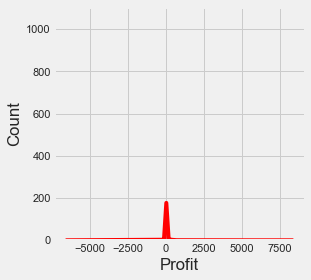

In [36]:
plt.figure(figsize=(4,4))
sns.histplot(data=store, x="Profit", kde=True, color="red")
plt.show()

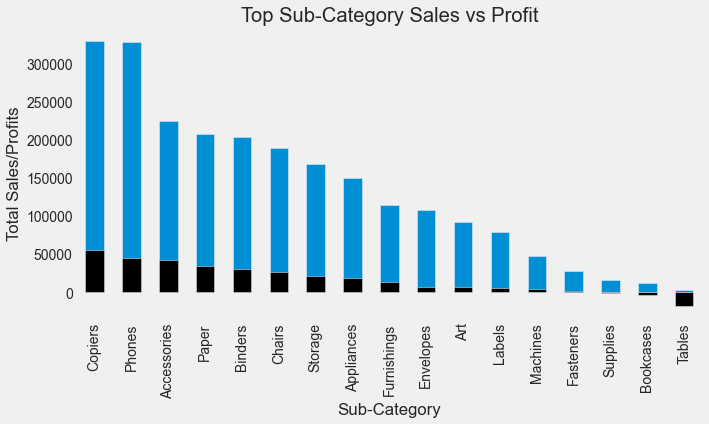

In [37]:
top_subcategory_sales = store.groupby("Sub-Category").Sales.sum().nlargest(n=100)
top_subcategory_profit = store.groupby("Sub-Category").Profit.sum().nlargest(n=100)

plt.style.use('fast')
top_subcategory_sales.plot(kind='bar', figsize = (10,5), fontsize = 14)
top_subcategory_profit.plot(kind='bar', figsize = (10,5), fontsize = 14,color = 'black')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales/Profits')
plt.title("Top Sub-Category Sales vs Profit")
plt.grid()
plt.show()

Inferences:

1. Efforts should be made to increase sales in Copiers and Phones as have the highest profit
2. As tables has negative profit, may be the product should be stopped or the price should be incresed

#### Plotting region wise Sales vs Profit

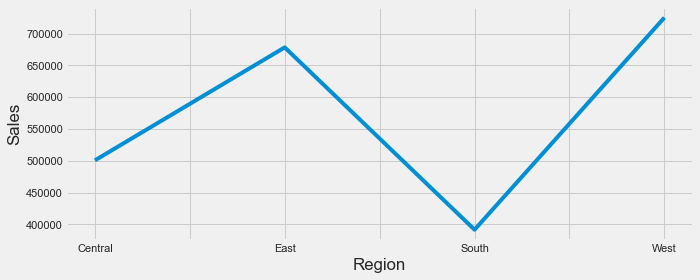

In [38]:
plt.figure(figsize=(10,4))
store.groupby('Region')['Sales'].sum().plot(kind='line')
plt.ylabel('Sales')
plt.show()

Inferences:
1. Regions in the west US have the most potential customers 
2. Regions in the south have least sales
    

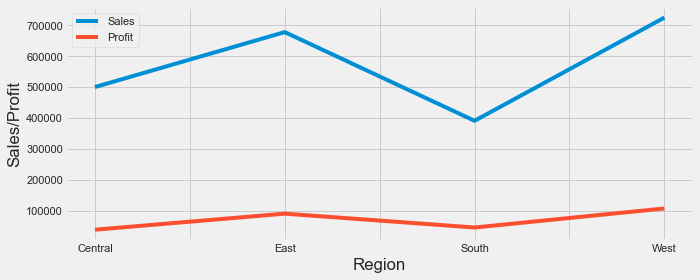

In [39]:
store.groupby('Region')[['Sales','Profit']].sum().plot(kind='line', figsize= (10,4))
plt.ylabel('Sales/Profit')
plt.show()

Inferences:
1. Eastern and Western region generates most profit 
2. Least profits are generated in the Central and Southern Regions
3. Strategies should be implemented in order to increase sales in the Southern Region and more discount can be offered in low profit generating regions. 
